# Aprendizaje Supervisado - Regresión

En este notebook comenzamos a trabajar en los problemas de **Regresión**, una de las tareas más importantes dentro de Machine Learning (dentro, a su vez, de lo que llamamos Aprendizaje Supervisado). Regresión en Machine Learning consiste en aprender etiquetas numéricas contínuas *y* a partir de un conjunto de atributos/features *X* (que pueden ser uno, dos, o muchos más) tomando como muestra un conjunto de instancias.

En la primera sección, vamos a comenzar introduciendo un dataset sintético unidimensional (un atributo + *y*), siguiendo una relación lineal. Y trataremos de aprender a predecir usando los siguientes modelos: Regresión Lineal, Árboles de Decisión y kNN. Luego, veremos cómo son las curvas obtenidas para cada modelo y cómo son los errores.

En la segunda sección, pasaremos a dos atributos (2D), el límite de lo que podremos visualizar. ¡Pero esto no significa que no podamos trabajar con más atributos!

## 1. Un atributo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

La siguiente celda genera nuestro dataset sintético. Por ahora, serán 500 puntos provenientes de una relación lineal 1-D de la forma $y = 3x - 2$. Asegúrate de identificar correctamente la pendiente y la ordenada al origen. Además, presta atención a que le sumamos *ruido*, para simular una situación un poco más realista.

In [ ]:
n = 500
X = np.linspace(-2,3,n)
y_real = 3*X - 2       #pendiente 3 y ordenada al origen 2
# y_real = X**2

y = y_real + 1.0*np.random.randn(n) #adiciono ruido el 1 es la importancia del ruido(orden de magnitud)
#el ruido le da las propiedades estadisticas a mi modelo. Son componentes aleatorios que no se pueden predecir.-->usamos estadisticas para estimar esos valores.



Y graficamos los puntos obtenidos junto con la curva teórica.

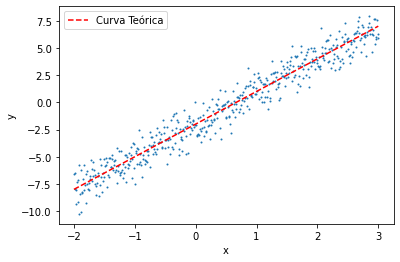

In [ ]:
plt.scatter(X,y, s = 1)   #size es s, se grafica la diespersion de puntos 
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r') #grafico la dispersion de puntos y la recta real que más ajustaría a los puntos
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Vamos a entrenar todos los modelos a la vez. Pero antes, no nos olvidemos del `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

X = X.reshape(-1,1) #lo convierto en un arreglo de dos dimensiones. paso el vector a una tabla.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42) #genero dupla entrenamiento y testeo(verdad)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(350, 1) (350,) (150, 1) (150,)


Definimos los modelos y entrenamos

In [ ]:
#modelos de aprendizaje supervisado del tipo regresion
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model = LinearRegression()#no tiene hiperparametros la regresion lineal.
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [ ]:
#entreno los modelos con mis datos de entrenamiento
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Veamos qué aprendieron.

La regresión lineal obtiene la pendiente y la ordenada al origen.

In [ ]:
#ayuda a tener interpretabilidad de lo predicho en funcion de las variables (son el Beta1, acompaña a la variable. y el b que es la variable independiente). 
#si no se parece a la funcion original, es porque está sesgado el modelo lineal.
#con esto calculo el"valor poblacional==relacion funcional"

print(linear_model.coef_, linear_model.intercept_) #veo linearcoef =pendiente, intercept=ordenada . modelo de regresion lineal

[2.98122423] -2.00487053347386


¿Están cerca de los valores reales? 

Así como los clasificadores obtienen fronteras de decisión que separan los datos, los regresores obtienen curvas que intentan aproximar los datos lo mejor posible. Veamos cómo son estas curvas para cada regresor.

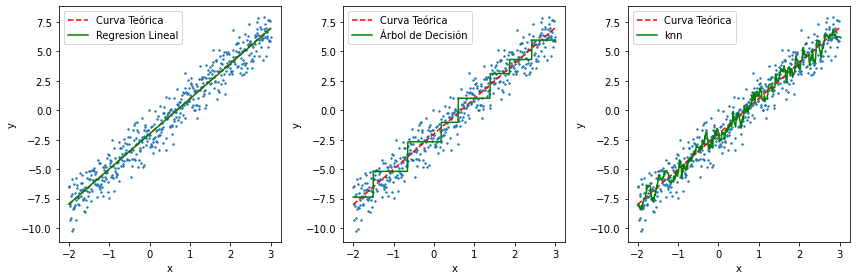

In [ ]:
plt.figure(figsize = (12,4))

plt.subplot(1,3,1)
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,linear_model.predict(X),label ='Regresion Lineal', c = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1,3,2)
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,tree_regressor.predict(X),label ='Árbol de Decisión', c = 'g')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1,3,3)
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,knn_regressor.predict(X),label ='knn', c = 'g')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

#los datos con formas de curva knn y AD funcionan bien. 
#aca la regresion lineal vale para datos más rectos"

Prestar atención a que la regresión lineal hace un muy buen trabajo en reproducir la curva teórica. ¿Qué te parecen los otros modelos?
 
    -Veo que la curva de regresión ajusta bastante aproximado la recta
    -El AD acerca de forma escalonada
    -El knn ajusta más ruidosa la recta

Veamos qué aprendió el árbol:

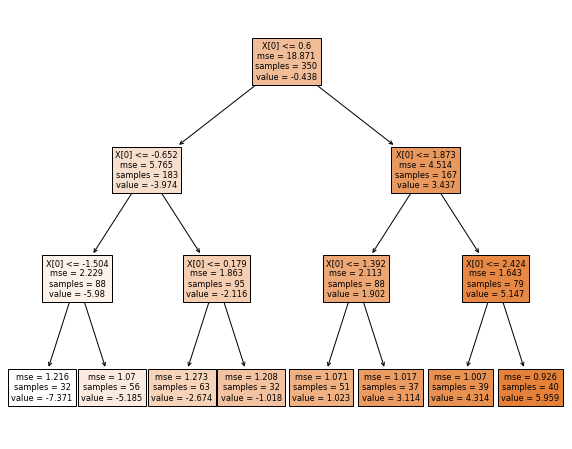

In [ ]:
from sklearn import tree
if tree_regressor.max_depth < 4: #veo el arbol de desición con el valor de regresión para profundidad 3
    plt.figure(figsize = (10,8))
    tree.plot_tree(tree_regressor, filled = True)
    plt.show()

#el mse tiende a disminuir en cada nodo, y el valor value varía mucho.

#acá está la idea que explicó andres en clase. sobre cómo divide los datos.

**Para pensar:** ¿Cómo se relaciona este arbol con la curva obtenida?

Veamos ahora cómo son los errores obtenidos. Vamos a hacer todo en la misma celda, pero tiene tres componentes importantes:
1. El cálculo del RMSE para cada conjunto (train y test).
1. Un gráfico de dispersión de $y$ vs $y_{predicho}$ para el conjunto de test. ¿Si la regresión es buena, cerca de que curva deberían estar los puntos?
1. El histograma de los errores ($y - y_{predicho}$) para cada conjunto.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 1.044506873584789
Raíz del error cuadrático medio en Test: 0.9149849338577514


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


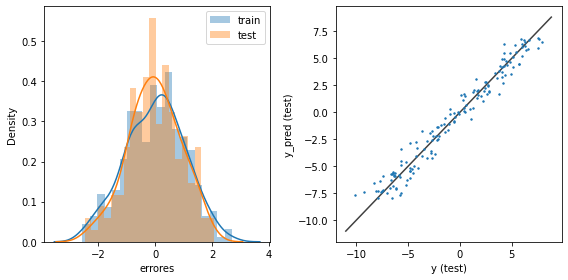

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 1.0505265927884646
Raíz del error cuadrático medio en Test: 1.1142617997822806


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


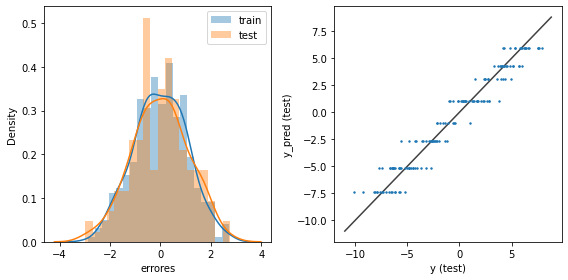

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 0.9321457837174736
Raíz del error cuadrático medio en Test: 1.032904140381926


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


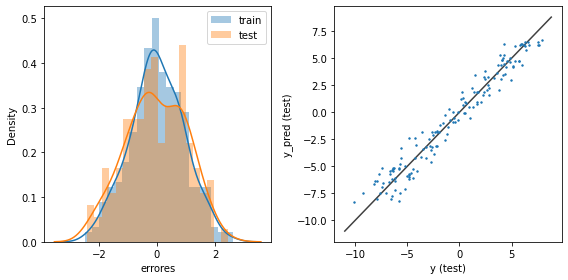

In [ ]:
#comparo los modelos con el valor de la metrica que me dá.
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')
    #El cálculo del RMSE para cada conjunto (train y test).
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))
    #El histograma de los errores (y - y_{predicho}) para cada conjunto.

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train') #entrenamiento
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test') #verdad
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    #Un gráfico de dispersión de 'y'=y vs $y_{predicho}$ para el conjunto de test (verdad).
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    #¿Si la regresión es buena, cerca de que curva deberían estar los puntos?
    #deben estar cerca de la curva y verdad.
    plt.tight_layout()
    plt.show()

    #la que mejor ajusta a los datos de verdad es la de regresión en este caso (una distribucion de datos lineales).
    #le sigue los vecinos más cercanos y luego AD que tiene un error mayor entre train y test(con una distribución más asimetrica)

En todos los casos, ocurre algo parecido:
1. Los errores RMSE representan el error global del regresor. Son similares tanto para test como para train, indicando que no hay un gran sobreajuste.
1. Los histogramas de los errores son simétricos, aproximadamente gaussianos, y parecidos para ambos conjuntos. Esto es un indicador de que estamos aproximando a nuestros datos de manera correcta.
1. En el gráfico $y$ vs $y_{predicho}$ para el conjunto de test, todos los puntos están cerca de la diagonal (la relación $y = x$), ¡que es lo que esperamos para un buen regresor! Además, el error parece ser similar en todo el rango de posibles valores. **Importante:** asegúrate de que entiendes este gráfico (¿qué ocurre en el caso del árbol?), el hecho de que los puntos deban estar sobre la recta diagonal $y = x$ **no** está relacionado con que estamos aproximando una relación lineal.


**Para probar**: dedicale un buen tiempo a probar distintos valores de `max_depth` y de `n_neighbors`. 

In [ ]:
def Regre(X,y,knn,profarbol):
    from sklearn.model_selection import train_test_split
    X = X.reshape(-1,1) #lo convierto en un vector
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) #genero dupla entrenamiento y testeo(verdad)
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    #modelos de aprendizaje supervisado del tipo regresion
    from sklearn.linear_model import LinearRegression
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.neighbors import KNeighborsRegressor
    linear_model = LinearRegression()
    tree_regressor = DecisionTreeRegressor(max_depth=profarbol, random_state=42)
    knn_regressor = KNeighborsRegressor(n_neighbors=knn)

    #entreno los modelos con mis datos de entrenamiento
    linear_model.fit(X_train, y_train)
    tree_regressor.fit(X_train, y_train)
    knn_regressor.fit(X_train, y_train)
    print(linear_model.coef_, linear_model.intercept_) #veo linearcoef =pendiente, intercept=ordenada


#    from sklearn import tree
#    if tree_regressor.max_depth < 10: #veo el arbol de desición con el valor de regresión para profundidad 3
#        plt.figure(figsize = (10,8))
#        tree.plot_tree(tree_regressor, filled = True)
#        plt.show()	
    #el mse tiende a disminuir en cada nodo, y el valor value varía mucho.
    from sklearn.metrics import mean_squared_error
    import seaborn as sns
    modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']
    for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        print(f'Modelo: {modelos[i]}')
      	#El cálculo del RMSE para cada conjunto (train y test).
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
        print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

        plt.figure(figsize = (8,4))
        #El histograma de los errores (y - y_{predicho}) para cada conjunto.
        plt.subplot(1,2,1)  
        sns.distplot(y_train - y_train_pred, bins = 20, label = 'train') #entrenamiento
        sns.distplot(y_test - y_test_pred, bins = 20, label = 'test') #verdad
        plt.xlabel('errores')
        plt.legend()
        ax = plt.subplot(1,2,2)
        ax.scatter(y_test,y_test_pred, s =2)

        lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
  			    np.max([ax.get_xlim(), ax.get_ylim()]),]  # max of both axes]
        
  	    #Un gráfico de dispersión de 'y'=y vs $y_{predicho}$ para el conjunto de test (verdad).
        ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
        plt.xlabel('y (test)')
        plt.ylabel('y_pred (test)')
  	    #¿Si la regresión es buena, cerca de que curva deberían estar los puntos?
  	    #deben estar cerca de la curva y verdad.
        plt.tight_layout()
#        plt.show()  
  	    #la que mejor ajusta a los datos de verdad es la de regresión en este caso (una distribucion de datos lineales).
  	    #le sigue los vecinos más cercanos y luego AD que tiene un error mayor entre train y test(con una distribución más asimetrica)
        
    plt.figure(figsize = (12,4))
    plt.subplot(1,3,1)
    plt.scatter(X,y, s = 2)
    plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
    plt.plot(X,linear_model.predict(X),label ='Regresion Lineal', c = 'g')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    
    plt.subplot(1,3,2)
    plt.scatter(X,y, s = 2)
    plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
    plt.plot(X,tree_regressor.predict(X),label ='Árbol de Decisión', c = 'g')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    
    plt.subplot(1,3,3)
    plt.scatter(X,y, s = 2)
    plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
    plt.plot(X,knn_regressor.predict(X),label ='knn', c = 'g')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.tight_layout()
    plt.show()


(350, 1) (350,) (150, 1) (150,)
[2.95160111] -1.953941193758793
Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 0.9718921789515064
Raíz del error cuadrático medio en Test: 1.0577879626097313
Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 0.8400110556831961
Raíz del error cuadrático medio en Test: 1.1776706139449948


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 1.5571635873263205
Raíz del error cuadrático medio en Test: 1.7619743582591576


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


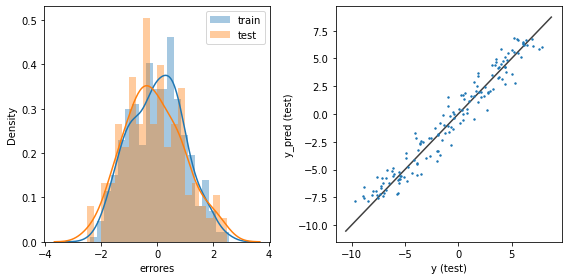

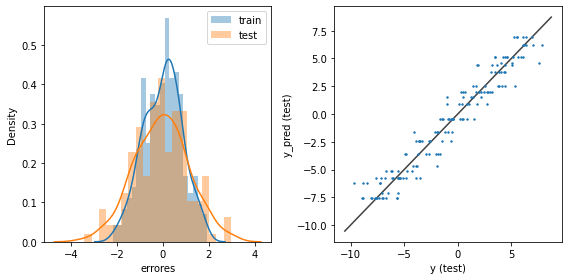

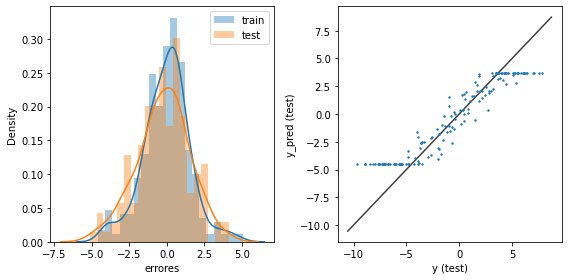

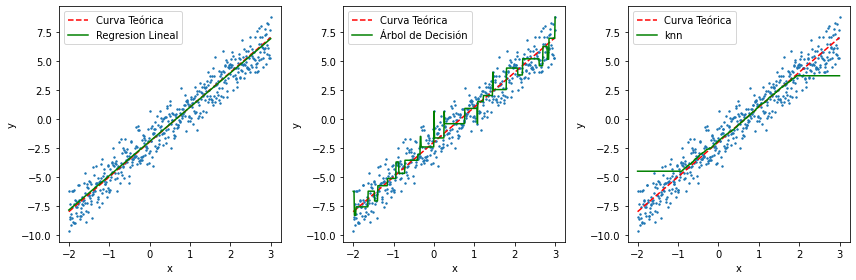

In [ ]:
n = 500
X = np.linspace(-2,3,n)
y_real = 3*X - 2       #pendiente 3 y ordenada al origen 2
y = y_real + 1.0*np.random.randn(n) #adiciono ruido

#plt.scatter(X,y, s = 1)   #size es s, se grafica la diespersion de puntos 
#plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r') #grafico la dispersion de puntos y la recta real que más ajustaría a los puntos
#plt.xlabel('x')
#plt.ylabel('y')
#plt.legend()
#plt.show()

knn=150
profarbol=5
Regre(X,y,knn,profarbol)


In [ ]:

#A mayor profundidad del arbol mejor el ajuste a la curva de parte del modelo arbol de desición empeora al superar la profundidad optima(aprox 6, donde tiende a la regresión de forma escalonada)
#Luego las profundidades espúreas generarn un desajuste en la regresión.



(350, 1) (350,) (150, 1) (150,)
[2.95160111] -1.953941193758793
Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 0.9718921789515064
Raíz del error cuadrático medio en Test: 1.0577879626097313
Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 1.3590606311031104
Raíz del error cuadrático medio en Test: 1.4831101859625881


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 0.0
Raíz del error cuadrático medio en Test: 1.5169344867874275


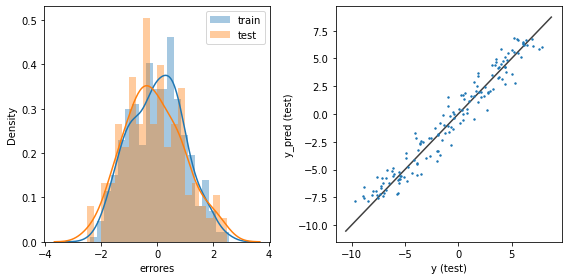

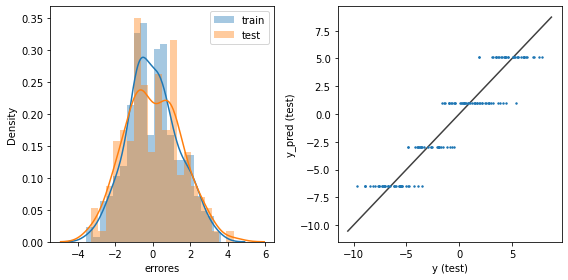

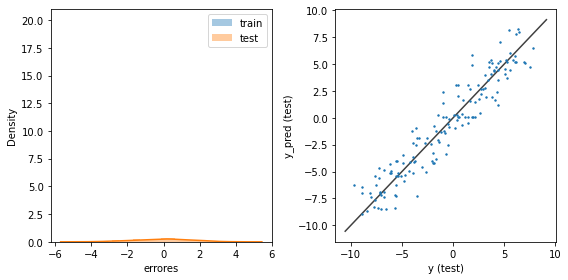

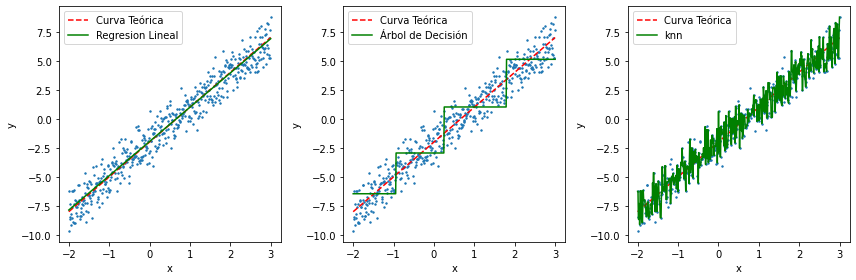

In [ ]:
#¿Qué ocurre cuando `n_neighbors = 1`?
#El ajuste empeora y el ajuste a la recta se distancia (el error aumenta)
knn=1
profarbol=2
Regre(X,y,knn,profarbol)
#Modelo: Regresión lineal
#Raíz del error cuadrático medio en Train: 1.0063682447868842
#Raíz del error cuadrático medio en Test: 1.106606455928993
#Modelo: Árbol de Decisión
#Raíz del error cuadrático medio en Train: 1.4352518043338696
#Raíz del error cuadrático medio en Test: 1.4814193855271791
#Modelo: Vecinos más cercanos
#Raíz del error cuadrático medio en Train: 0.0
#Raíz del error cuadrático medio en Test: 1.5741715997144619


In [ ]:
#¿Puedes diferenciar en el gráfico cuáles instancias se usaron para entrenamiento y cuáles para testeo?
#las intancias de entrenamiento son  los puntos que toca la linea del modelo y las de testeo son las AZULES (QUEDA CLARO EN EL ANALISIS CUADRATICO)


#¿Y si `n_neighbors` tiende a la cantidad de instancias(150) en el set de entrenamiento qué sucede?
#A mayor cantidad de knn el ajuste tiende a ser el ajuste lineal. (si n->inf  knn->reg.lineal)


**Para probar**: una vez que te sientas cómodo/a con la aproximación de la función lineal, cambia de relación funcional. Te dejamos una comentada para arrancar. Presta atención a las siguientes preguntas. ¿Cuáles modelos siguen aproximando correctamente?¿Cuáles no?¿Qué ocurre con el análisis de los errores?

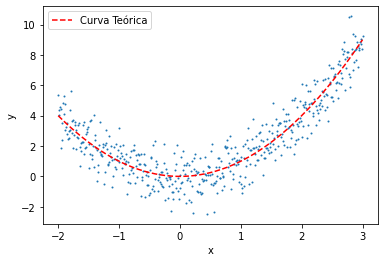

In [ ]:
n = 500
X = np.linspace(-2,3,n)
y_real = X**2

y = y_real + 1.0*np.random.randn(n) #adiciono ruido

plt.scatter(X,y, s = 1)   #size es s, se grafica la diespersion de puntos 
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r') #grafico la dispersion de puntos y la recta real que más ajustaría a los puntos
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()




In [ ]:
from sklearn.model_selection import train_test_split

X = X.reshape(-1,1) #lo convierto en un vector
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42) #genero dupla entrenamiento y testeo(verdad)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(350, 1) (350,) (150, 1) (150,)


In [ ]:
#modelos de aprendizaje supervisado del tipo regresion
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)


#entreno los modelos con mis datos de entrenamiento
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

print(linear_model.coef_, linear_model.intercept_) #veo linearcoef =pendiente, intercept=ordenada

[1.03658857] 1.706197929265517


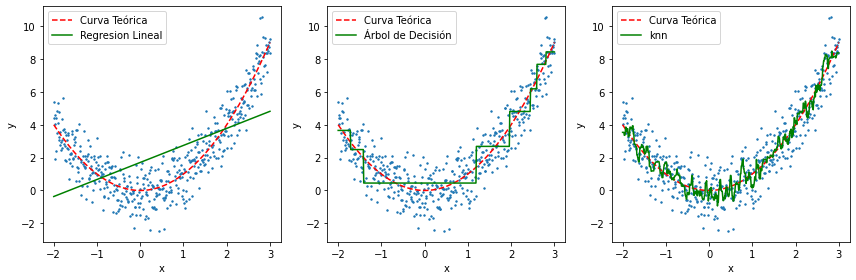

In [ ]:
plt.figure(figsize = (12,4))

plt.subplot(1,3,1)
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,linear_model.predict(X),label ='Regresion Lineal', c = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1,3,2)
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,tree_regressor.predict(X),label ='Árbol de Decisión', c = 'g')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1,3,3)
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,knn_regressor.predict(X),label ='knn', c = 'g')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
#from sklearn import tree
#if tree_regressor.max_depth < 4: #veo el arbol de desición con el valor de regresión para profundidad 3
#    plt.figure(figsize = (10,8))
#    tree.plot_tree(tree_regressor, filled = True)
#    plt.show()
#el mse tiende a disminuir en cada nodo, y el valor value varía mucho.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 2.119699287652362
Raíz del error cuadrático medio en Test: 2.15813681255026


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


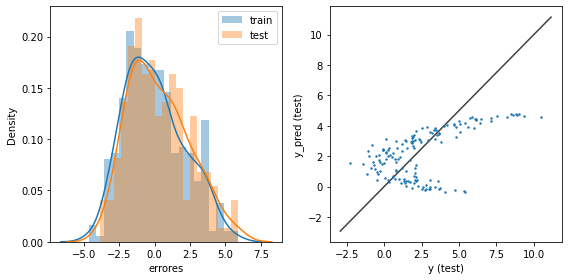

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 1.0421419629236217
Raíz del error cuadrático medio en Test: 1.1347498212254938


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


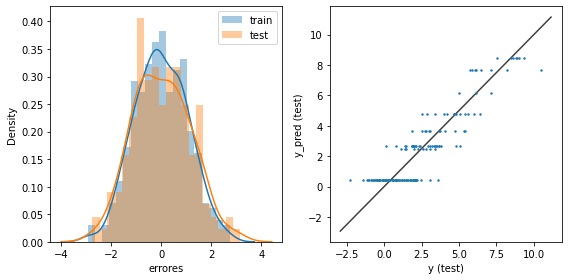

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 0.8722487667768307
Raíz del error cuadrático medio en Test: 1.0648820931841472


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


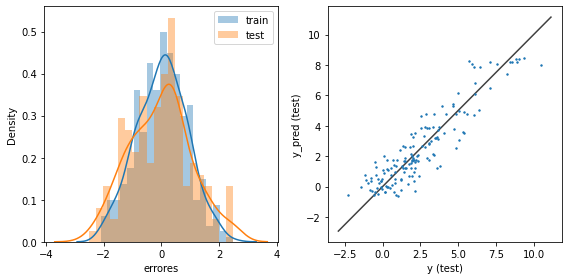

In [ ]:

from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')
    #El cálculo del RMSE para cada conjunto (train y test).
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))
    #El histograma de los errores (y - y_{predicho}) para cada conjunto.

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train') #entrenamiento
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test') #verdad
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    #Un gráfico de dispersión de 'y'=y vs $y_{predicho}$ para el conjunto de test (verdad).
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    #¿Si la regresión es buena, cerca de que curva deberían estar los puntos?
    #deben estar cerca de la curva y verdad.
    plt.tight_layout()
    plt.show()

    #la que mejor ajusta a los datos de verdad es la de regresión en este caso (una distribucion de datos lineales).
    #le sigue los vecinos más cercanos y luego AD que tiene un error mayor entre train y test(con una distribución más asimetrica)



## 2. Dos atritutos

Ahora, replicaremos el mismo análisis, pero para una relación lineal con dos atributos, $y = -3x_1 + 2x_2 + 4$. Nuevamente, sumaremos algo de ruido para hacerlo más realista.

In [ ]:
n = 500
x1 = np.random.rand(n)
x2 = np.random.rand(n)
y = -3*x1 + 2*x2 + 4 + 0.25*np.random.randn(n) #poco ruido menor a 1, mucho ruido mayor a 1 (más dificil de predecir, más aleatorio).
# y = 10*(x1 - 0.5)**2 + 10*(x2-0.5)**2 + 0.1*np.random.randn(n) # Da como resultado una superficie curva, tipo cuenco.


Visualizamos. El código es un poco más complejo, no te preocupes si no lo entiendes de

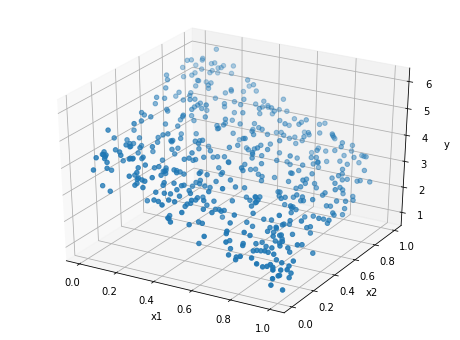

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter(x1, x2, y, ax=None, fig = None):
    if (fig is None) and (ax is None):
        fig = plt.figure(figsize = (8,6))
        ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

plot_3d_scatter(x1, x2, y, ax=None, fig = None) #HACE UN SCATTER 3D

Creamos los atributos y hacemos un `train_test_split`

In [ ]:
X = np.vstack((x1,x2)).T  #Stack arrays in sequence vertically (row wise).

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(350, 2) (350,) (150, 2) (150,)


Definimos los modelos y entrenamos

In [ ]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=2)

In [ ]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

Veamos qué aprendieron.

La regresión lineal obtiene **las pendientes** y la ordenada al origen

In [ ]:
print(linear_model.coef_, linear_model.intercept_) #COMO TENGO DOS ATRIBUTOS, TENGO DOS PENDIENTES=COEF

[-3.00723778  1.94103709] 4.008877654774432


En este caso, la curva que aproxima a los datos no es más una curva, sino una superficie. La siguiente función nos ayuda a graficar.

In [ ]:
from matplotlib import cm
#ARMO UNA FUNCION 3D PARA LOS DATOS
def plot_3d_regressor(x1_min, x1_max, x2_min,x2_max, N, regressor, ax=None, fig = None):
    x1 = np.linspace(x1_min,x1_max,N) 
    x2 = np.linspace(x2_min,x2_max,N)
    X1, X2 = np.meshgrid(x1,x2) #GENERO EL MESH PARA EL PLOT 3D
    
    y = regressor.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Y = y.reshape(X1.shape)
    
    if (fig is None) and (ax is None):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.5)

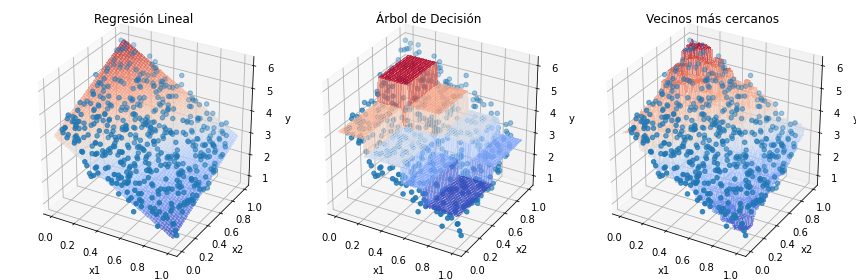

In [ ]:
fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot(131, projection='3d') #ES UNA SUPERFICIE PLANA
plt.title('Regresión Lineal')
plot_3d_regressor(0, 1, 0, 1, 100, linear_model, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)


ax = fig.add_subplot(132, projection='3d') #ES MÁS ESCALONADO
plt.title('Árbol de Decisión')
plot_3d_regressor(0, 1, 0, 1, 100, tree_regressor, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)

ax = fig.add_subplot(133, projection='3d') #LO HACE MÁS DEL FORMATO INTEGRAL
plt.title('Vecinos más cercanos')
plot_3d_regressor(0, 1, 0, 1, 100, knn_regressor, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)

plt.tight_layout()
plt.show()



Veamos qué aprendió el árbol:

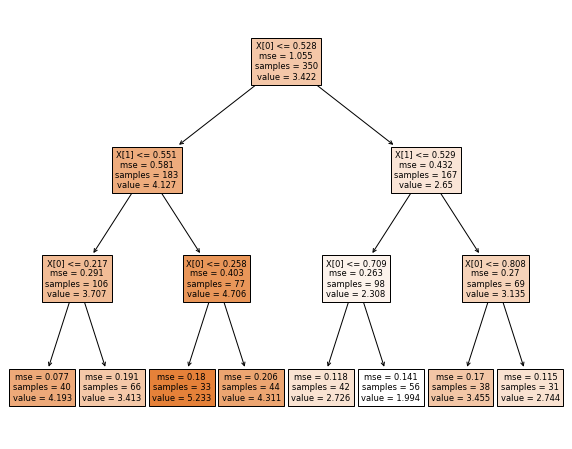

In [ ]:
if tree_regressor.max_depth < 4:
    plt.figure(figsize = (10,8))
    tree.plot_tree(tree_regressor, filled = True)
    plt.show()

Y, nuevamente, los errores.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 0.24536291200118923
Raíz del error cuadrático medio en Test: 0.25458687863597695


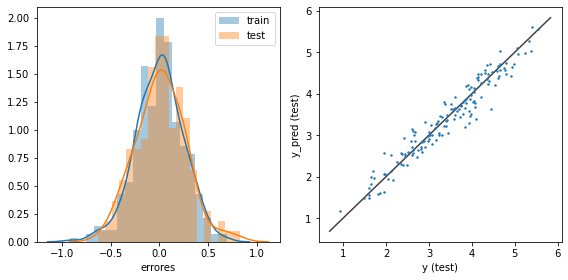

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 0.39108347735121884
Raíz del error cuadrático medio en Test: 0.48520544217121436


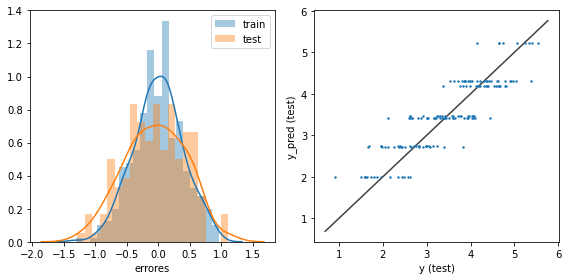

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 0.18073589678166418
Raíz del error cuadrático medio en Test: 0.32821005666979164


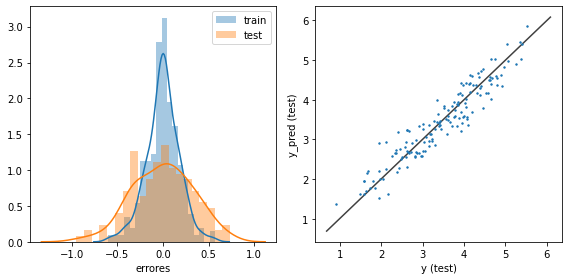

In [ ]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')

    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

**Para probar**: nuevamente, dedicale un buen tiempo a probar distintos valores de `max_depth` y de `n_neighbors`.


In [ ]:

from matplotlib import cm
#ARMO UNA FUNCION 3D PARA LOS DATOS
def plot_3d_regressor(x1_min, x1_max, x2_min,x2_max, N, regressor, ax=None, fig = None):
    x1 = np.linspace(x1_min,x1_max,N) 
    x2 = np.linspace(x2_min,x2_max,N)
    X1, X2 = np.meshgrid(x1,x2) #GENERO EL MESH PARA EL PLOT 3D
    
    y = regressor.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Y = y.reshape(X1.shape)
    
    if (fig is None) and (ax is None):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.5)


def Regre3d(x1,x2,y,knn,profarbol):
  	X = np.vstack((x1,x2)).T  #Stack arrays in sequence vertically (row wise).
  	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)  
  	print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
  	linear_model = LinearRegression()
  	tree_regressor = DecisionTreeRegressor(max_depth=profarbol, random_state=42)
  	knn_regressor = KNeighborsRegressor(n_neighbors=knn)

  	linear_model.fit(X_train, y_train)
  	tree_regressor.fit(X_train, y_train)
  	knn_regressor.fit(X_train, y_train)

  	print(linear_model.coef_, linear_model.intercept_) #COMO TENGO DOS ATRIBUTOS, TENGO DOS PENDIENTES=COEF

  	fig = plt.figure(figsize = (12,4))
  	ax = fig.add_subplot(131, projection='3d') #ES UNA SUPERFICIE PLANA
  	plt.title('Regresión Lineal')
  	plot_3d_regressor(0, 1, 0, 1, 100, linear_model, ax, fig)
  	plot_3d_scatter(x1, x2, y, ax, fig)

  	ax = fig.add_subplot(132, projection='3d') #ES MÁS ESCALONADO
  	plt.title('Árbol de Decisión')
  	plot_3d_regressor(0, 1, 0, 1, 100, tree_regressor, ax, fig)
  	plot_3d_scatter(x1, x2, y, ax, fig)

  	ax = fig.add_subplot(133, projection='3d') #LO HACE MÁS DEL FORMATO INTEGRAL
  	plt.title('Vecinos más cercanos')
  	plot_3d_regressor(0, 1, 0, 1, 100, knn_regressor, ax, fig)
  	plot_3d_scatter(x1, x2, y, ax, fig)

  	plt.tight_layout()
  	plt.show()    

  	from sklearn.metrics import mean_squared_error
  	import seaborn as sns
  	modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']
  	for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
          y_train_pred = model.predict(X_train)
          y_test_pred = model.predict(X_test)
          print(f'Modelo: {modelos[i]}')
          rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
          rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
          print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
          print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
          
          plt.figure(figsize = (8,4))
          plt.subplot(1,2,1)
          sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
          sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
          plt.xlabel('errores')
          plt.legend()
          
          ax = plt.subplot(1,2,2)
          ax.scatter(y_test,y_test_pred, s =2)    
          lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
             			np.max([ax.get_xlim(), ax.get_ylim()])]  # max of both axes]
          ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
          plt.xlabel('y (test)')
          plt.ylabel('y_pred (test)')
          plt.tight_layout()
  		    #plt.show()

(350, 2) (350,) (150, 2) (150,)
[-3.01022483  1.92553458] 4.037305737367825


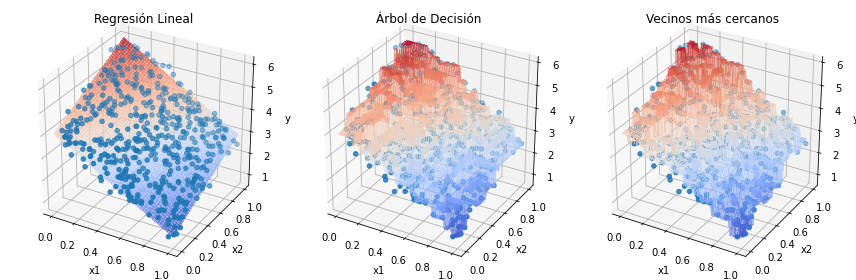

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 0.23964712959066783
Raíz del error cuadrático medio en Test: 0.2306950309575429
Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 0.0
Raíz del error cuadrático medio en Test: 0.3539351918626437


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 0.0
Raíz del error cuadrático medio en Test: 0.34090891804558243


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


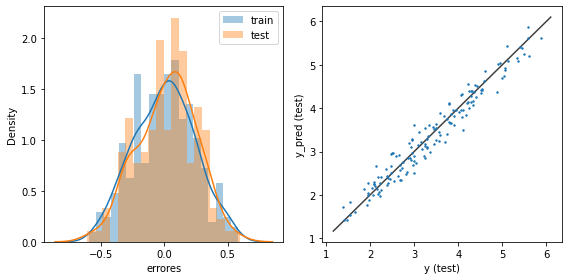

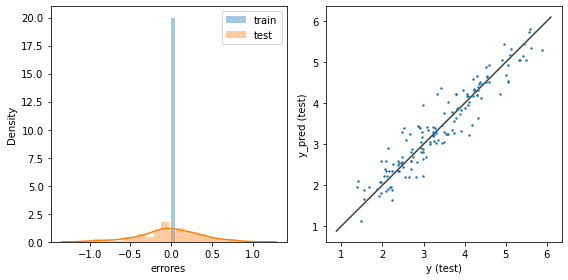

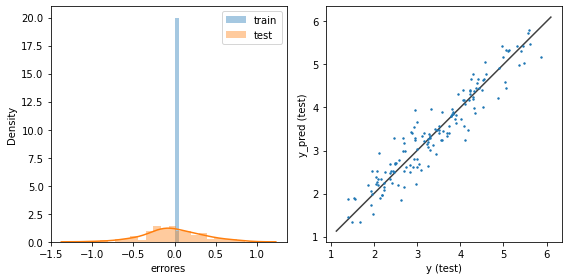

In [ ]:
n = 500
x1 = np.random.rand(n)
x2 = np.random.rand(n)
y = -3*x1 + 2*x2 + 4 + 0.25*np.random.randn(n)
# y = 10*(x1 - 0.5)**2 + 10*(x2-0.5)**2 + 0.1*np.random.randn(n) # Da como resultado una superficie curva, tipo cuenco.

knn=1
profarbol=15

Regre3d(x1,x2,y,knn,profarbol)
#¿Qué ocurre cuando `n_neighbors = 1`?
#

#si profarbol es chica es el ajuste es burdo, muy escalonado
#si profarbol es grande (cercano al optimo) ajusta de forma integrada escalonada bien, pero luego hay mucho ruido espureo que desajusta

#si knn es 1 El ajuste empeora y el ajuste a la recta se distancia (el error aumenta)
#si knn es grande tiende a ajustar bien hasta el numero de instancia, hace que en el medio se ajuste y en los extremos no.



**Para probar**: una vez que te sientas cómodo/a con la aproximación de la función lineal, cambia de relación funcional. Te dejamos una comentada para arrancar. Vuelve a responder: ¿Cuáles modelos siguen aproximando correctamente?¿Cuáles no?¿Qué ocurre con el análisis de los errores?


(350, 2) (350,) (150, 2) (150,)
[ 0.01042459 -0.00033173] 1.7132059596727465


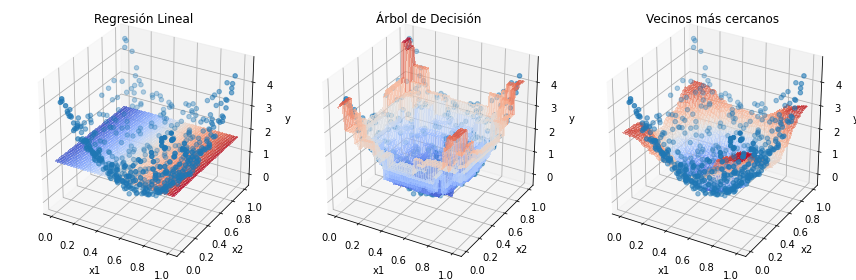

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 1.0070211720585145
Raíz del error cuadrático medio en Test: 1.0766430608398507
Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 1.17384899700355e-05
Raíz del error cuadrático medio en Test: 0.27814909965337825
Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 0.32962305110893286
Raíz del error cuadrático medio en Test: 0.37224116497696164


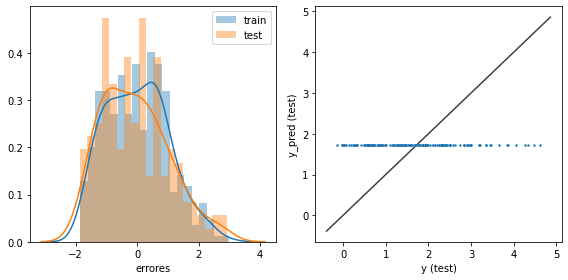

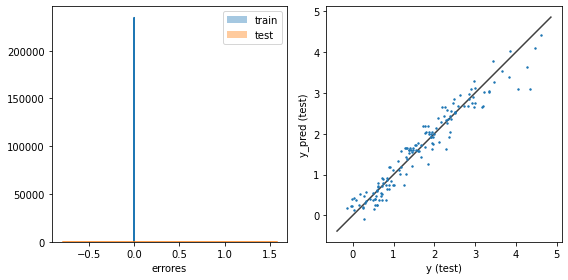

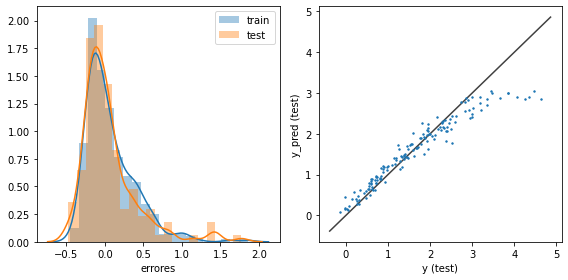

In [ ]:

n = 500
x1 = np.random.rand(n)
x2 = np.random.rand(n)
y = 10*(x1 - 0.5)**2 + 10*(x2-0.5)**2 + 0.1*np.random.randn(n) # Da como resultado una superficie curva, tipo cuenco.

knn=20
profarbol=75

Regre3d(x1,x2,y,knn,profarbol)
#¿Cuáles modelos siguen aproximando correctamente?¿Cuáles no?¿Qué ocurre con el análisis de los errores?
#los modelos de vecinos cercanos ajusta bien los datos no extremos (tienen más pesos fuera del extremo porque ahí hay mas vecinos,
# en el extremo no), los AD los considera. 

#la regresión lineal es entendible que no porque la funcion es cuadratica